In [1]:
# Import stuff: 
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sympy import Symbol
from sympy.solvers import solve

# This is for reasonable fontsize universally defined:
fs_label = 16
parameters = {                
                'figure.titlesize': fs_label+6,
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.linewidth': 5
             }
plt.rcParams.update(parameters)

In [2]:
# Parameters: 
# TODO: use the real values
params_dict = dict(
    d1 = 0.8, # zygote
    d2 = 0.8, # planula
    d3 = 0.1,
    d4 = 0.5,
    d5 = 0.5,
    d6 = 0.4,
    t1 = 1,
    t2 = 2,
    t3 = 4,
    t4 = 4,
    t5 = 1,
    t6 = 4,
    phi = 80, 
)

for k, v in params_dict.items():
    assign_str = f"{k} = {v}"
    exec(assign_str)

params_dict.update(
    g1 = (1-d2)*(t1-1)/t1, # zygote
    g2 = (1-d2)*(t2-1)/t2, # planula
    g3 = (1-d3)*(t3-1)/t3, # cyst
    g4 = (1-d4), # *(t4-1)/t4, # polyp
    g5 = (1-d5)*(t5-1)/t5, # medusa (juvenile)
    g6 = (1-d6)*(t6-1)/t6, # medusa (mature)
    h12 = (1-d1)/t1, 
    h24 = (1-d2)/t2,  
    h34 = (1-d3)/t3, 
    h45 = (1-d4)*2, #/t4,  
    h56 = (1-d5)/t5  
)

for k, v in params_dict.items():
    assign_str = f"{k} = {v}"
    exec(assign_str)
    print(assign_str)
    
names = ["Zygote", "Planula", "Cyst", "Polyp", "Medusa (juvenile)", "Medusa (mature)"]

d1 = 0.8
d2 = 0.8
d3 = 0.1
d4 = 0.5
d5 = 0.5
d6 = 0.4
t1 = 1
t2 = 2
t3 = 4
t4 = 4
t5 = 1
t6 = 4
phi = 80
g1 = 0.0
g2 = 0.09999999999999998
g3 = 0.675
g4 = 0.5
g5 = 0.0
g6 = 0.44999999999999996
h12 = 0.19999999999999996
h24 = 0.09999999999999998
h34 = 0.225
h45 = 1.0
h56 = 0.5


In [3]:
L = lambda xi: np.array([
    [g1,  0,   0,   0,   0,          phi*(1-d6)*(1/t6)*(1-xi)], 
    [h12, g2,  0,   0,   0,          0], 
    [0,   0,   g3,  0,   (1-d5)*xi,  (1-d6)*xi], 
    [0,   h24, h34, g4,  0,          0], 
    [0,   0,   0,   h45, g5*(1-xi),  0], 
    [0,   0,   0,   0,   h56*(1-xi), g6*(1-xi)]
])

#L = lambda xi: np.array([
#    [g1,  0,   0,   0,   0,          phi*(1-d6*xi)*(1/t6)*(1-xi)], 
#    [h12, g2,  0,   0,   0,          0], 
#    [0,   0,   g3,  0,   (1-d5*xi)*xi,  (1-d6*xi)*xi], 
#    [0,   h24, h34, g4,  0,          0], 
#    [0,   0,   0,   h45, (1-d5*xi)*(t5-1)/t5*(1-xi),  0], 
#    [0,   0,   0,   0,   (1-d5*xi)/t5*(1-xi), (1-d6*xi)*(t6-1)/t6*(1-xi)]
#])

(1-d2)*(t1-1)/t1

cs = ["blue", "green", "red", "cyan", "magenta", "orange"]
ss = []
gr = []
pvs = []
xis = np.arange(0.00, 1, 0.005)
#fig, ax = plt.subplots()
eig_values_old, eig_vectors_old = None, None
for i, xi in enumerate(xis):
    
    eig_values, eig_vectors = np.linalg.eig(L(xi))
    eig_vectors = eig_vectors.T
    isort = np.argsort([abs(z) for z in eig_values])
    if i != 0:
        closest = np.array([min(eig_values, key=lambda x: np.abs(x-m)) for m in eig_values_old])
        plot_vals = closest
    else:
        plot_vals = eig_values[isort] 
    #print(eig_vectors[isort][-1])
    #plot_vals = (i==0)*eig_values[isort] + (i!=0)*closest
    #[ax.scatter(xi, abs(j)) for j in eig_values[isort]]
    pvs.append(plot_vals)
    gr.append(eig_values[isort][-1])
    ss.append(eig_vectors[isort][-1])
    eig_values_old, eig_vectors_old = plot_vals, eig_vectors[isort]



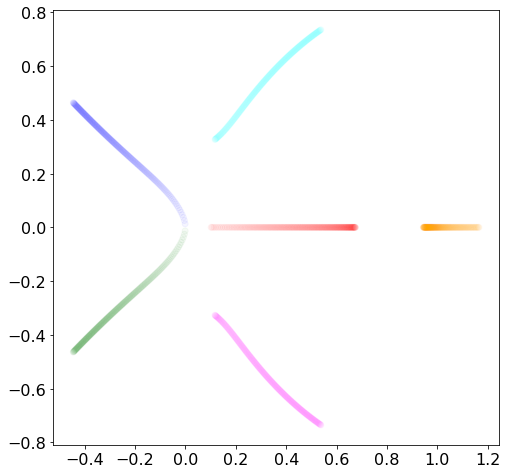

In [4]:
fig, ax = plt.subplots(figsize=(8, 8))
for v in pvs:
    ax.scatter(*list(zip(*[(z.real, z.imag) for z in v])), color=cs, alpha=0.04)

Text(0, 0.5, '$\\Im(\\lambda_{{dom}})$ \n (charecteristic osc. freq)')

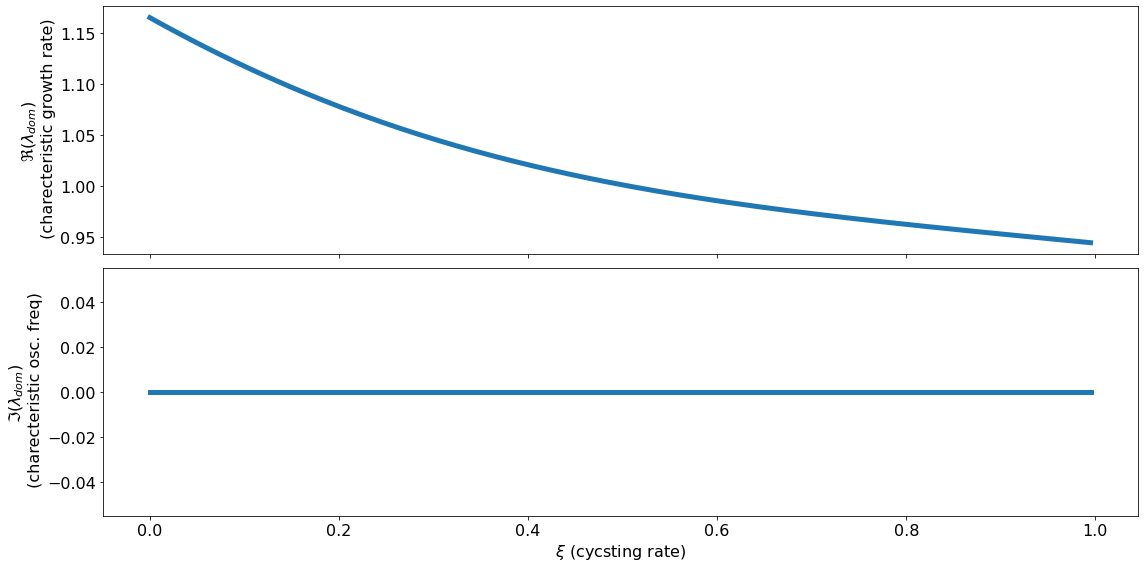

In [5]:
fig, ax = plt.subplots(2, 1, figsize=(16, 8), sharex=True, tight_layout=True)
ax[0].plot(xis, [e.real for e in gr])
ax[1].plot(xis, [e.imag for e in gr])

ax[1].set_xlabel("$\\xi$ (cycsting rate)")
ax[0].set_ylabel("$\\Re(\\lambda_{{dom}})$ \n (charecteristic growth rate)")
ax[1].set_ylabel("$\\Im(\\lambda_{{dom}})$ \n (charecteristic osc. freq)")


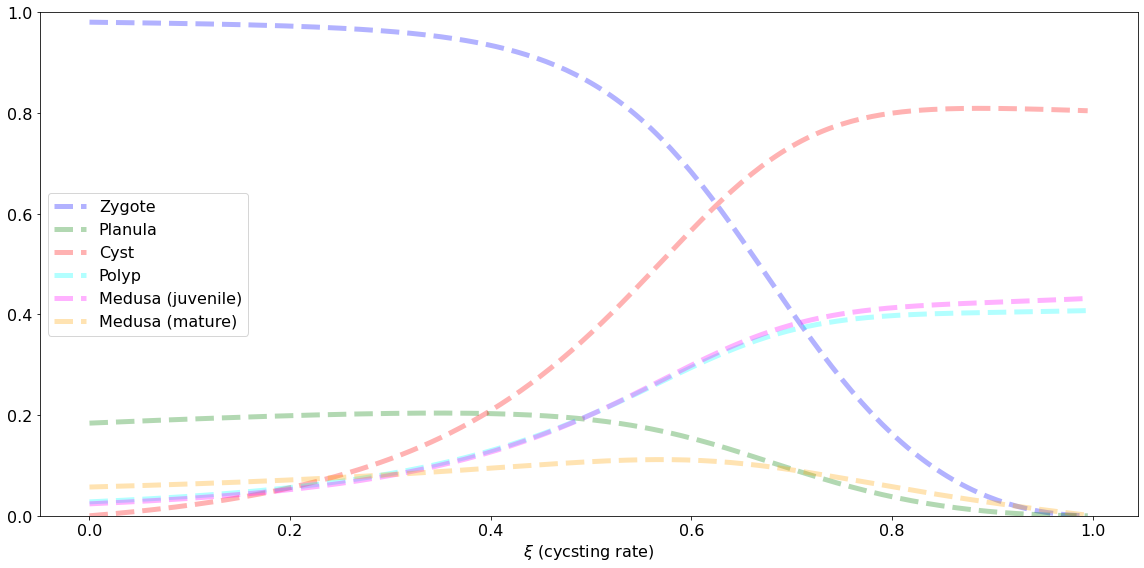

In [6]:
ss = np.array(ss)
#ax[1].plot(*list(zip(*[(z.real, z.imag) for z in ss.T])))
fig, ax = plt.subplots(1, 1, figsize=(16, 8), sharex=True, tight_layout=True)
for i, e in enumerate(ss.T):
    ax.plot(xis, abs(e), linestyle="--", marker="", label=names[i], color=cs[i], alpha=0.3)
ax.set_ylim(0, 1)
ax.set_xlabel("$\\xi$ (cycsting rate)")
ax.legend()
